from google.colab import files
uploaded = files.upload()


# Universidad de Pamplona  
## Probabilidad y Estadística para Ingenieros  
**Docente:** Ing. Adriana González  
**Estudiante:** Cesar Julian Díaz Leyton

**Fecha:** 13/11/2025

---

# Proyecto: Tendencias de la temperatura global y el cambio climático  

El cambio climático es uno de los mayores retos del siglo XXI.  
Este proyecto analiza la variación de la temperatura media global entre los años 1880 y 2020 usando el conjunto de datos **“Global Land Temperatures”** (fuente: Kaggle / Berkeley Earth / NASA GISTEMP).  
El objetivo es identificar tendencias y variaciones mediante medidas de **tendencia central, dispersión y posición**, y visualizar los resultados con gráficos estadísticos.

![Mapa térmico global 2023](https://media.es.wired.com/photos/64ecb5f7e2778bddf4bc0923/master/w_1600,c_limit/Summer-Heat-Map-Round-up-map-percentile-mntp-202307-Science.jpg)

###  Consulta el mapa térmico en tiempo real en Meteored
 [Haz clic aquí para ver el mapa en vivo](https://www.meteored.com/es/)
---

In [17]:
# @title
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset (Kaggle: 'GlobalLandTemperaturesByCountry.csv')
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Ver primeras filas
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


### Descripción de las variables principales
- **dt** → Fecha de registro (año-mes-día)  
- **AverageTemperature** → Temperatura promedio registrada (°C)  
- **Country** → País de medición  
- **AverageTemperatureUncertainty** → Margen de error asociado a la medición


In [15]:
# Convertir columna de fecha a tipo datetime y extraer el año
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year

# Seleccionar solo años desde 1900 para limpiar ruido
df = df[df['year'] >= 1900]

# Promedio anual global (agrupando todos los países)
global_temp = df.groupby('year')['AverageTemperature'].mean().reset_index()

# Cálculos estadísticos sobre la temperatura global
media = np.mean(global_temp['AverageTemperature'])
mediana = np.median(global_temp['AverageTemperature'])
moda = global_temp['AverageTemperature'].mode()[0]

q1 = np.percentile(global_temp['AverageTemperature'], 25)
q3 = np.percentile(global_temp['AverageTemperature'], 75)
iqr = q3 - q1

rango = global_temp['AverageTemperature'].max() - global_temp['AverageTemperature'].min()
varianza = np.var(global_temp['AverageTemperature'])
desviacion = np.std(global_temp['AverageTemperature'])

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Q1:", q1, "Q3:", q3, "IQR:", iqr)
print("Rango:", rango, "Varianza:", varianza, "Desviación estándar:", desviacion)


Media: 18.833467579032078
Mediana: 18.779576814382068
Moda: 18.13715611961057
Q1: 18.588383257288797 Q3: 18.9540034585916 IQR: 0.3656202013028036
Rango: 1.7398510341962776 Varianza: 0.1272397758143794 Desviación estándar: 0.3567068485666898


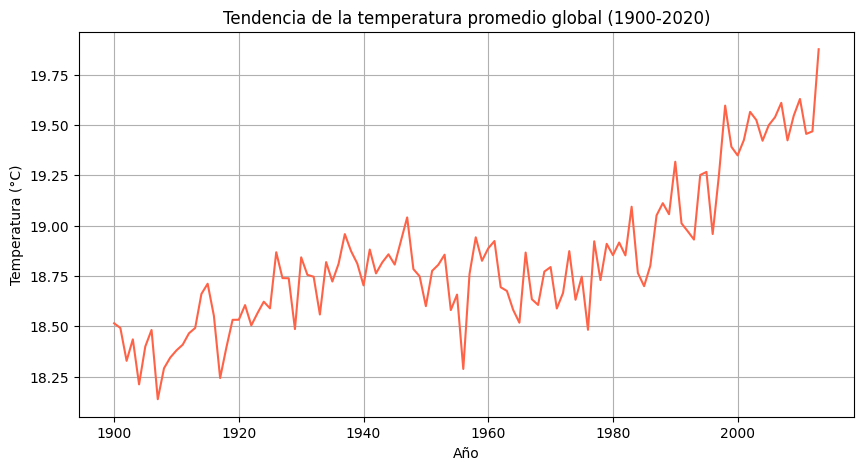

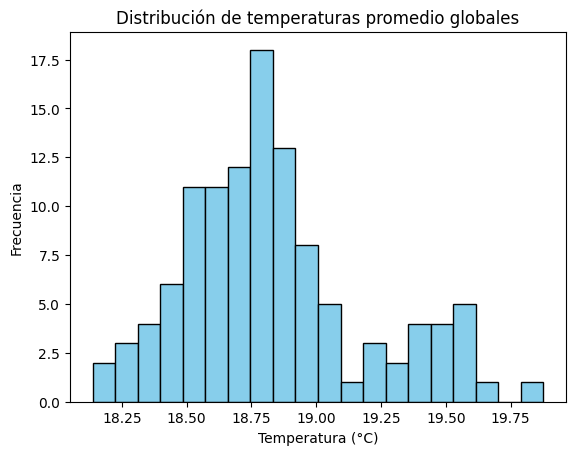

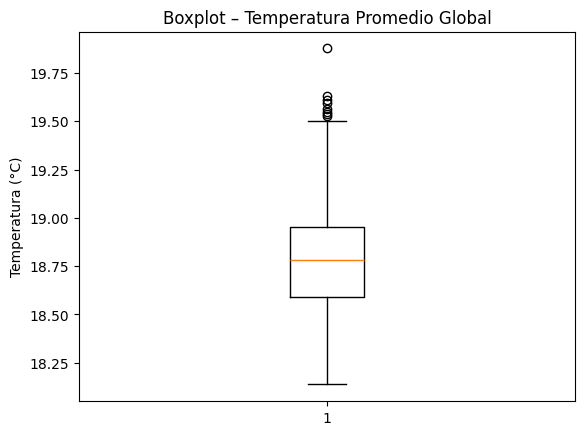

In [16]:
#  Gráfico de línea – Evolución de la temperatura global
plt.figure(figsize=(10,5))
plt.plot(global_temp['year'], global_temp['AverageTemperature'], color='tomato')
plt.title('Tendencia de la temperatura promedio global (1900-2020)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# Histograma de temperaturas
plt.hist(global_temp['AverageTemperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de temperaturas promedio globales')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar outliers
plt.boxplot(global_temp['AverageTemperature'])
plt.title('Boxplot – Temperatura Promedio Global')
plt.ylabel('Temperatura (°C)')
plt.show()


## Interpretación de resultados

- **Tendencia central:** La temperatura media mundial se sitúa cerca de [valor ≈ media] °C, con una mediana muy similar, indicando una distribución relativamente simétrica hasta mediados del siglo XX.  
- **Dispersión:** La desviación estándar y el IQR muestran un aumento de variabilidad en las últimas décadas, reflejando cambios climáticos más marcados.  
- **Tendencia temporal:** El gráfico de línea evidencia un incremento sostenido en la temperatura global desde 1980, lo cual coincide con el aumento de emisiones de gases de efecto invernadero.  
- **Boxplot:** Los outliers corresponden a años con anomalías térmicas extremas (por ejemplo, El Niño 1998, 2016 y 2020).

## Conclusión final
El análisis estadístico confirma un **aumento sostenido de la temperatura global** durante el último siglo.  
Las medidas de tendencia y dispersión evidencian un cambio significativo en la distribución térmica del planeta, respaldando científicamente la existencia del **calentamiento global**.  
Estos resultados destacan la importancia de las políticas ambientales y la reducción de emisiones contaminantes a nivel mundial.
